In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json,os
from IPython.core.pylabtools import figsize
FDC_path = r"E:\FDC\dataset"
figsize(10,10) 
#FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')

# Read Data

In [2]:
import data_vis as dv
import importlib
importlib.reload(dv)




FDC_2021Data = dv.read_data(os.path.join(FDC_path,'data_all_exclude_miss.csv'))
Y_LIST = [1,2,3,4,5,6,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37]

X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)
FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST],axis=1)
dv.df_col_map(FDC_2021Data)
#FDC_2021Data = dv.fill_nan_value(FDC_2021Data)
#dv.df_col_map(FDC_2021Data)
"""
Y_LIST = [3,4,5,6,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37]
X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)

FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST])

dv.df_col_map(FDC_2021Data)
"""

0 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
1 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
2 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
3 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
4 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
5 : Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10
6 : Latch:_LA_269353065_PostbondEpoxyCoverageCheckData;_CEID15652.10
7 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
8 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
9 : Sig:_BondProcess_PBIEpoxyCoverage_(post_Step)
10 : Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6
11 : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
12 : Latch:_LA_252314679_BondForceNotHighForceArray_ECRO;_CEID15652.8
13 : Latch:_LA_252314736_BondDistanceToBondPosition_ECRO;_CEID15652.9
14 : Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11
15 : Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652

'\nY_LIST = [3,4,5,6,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37]\nX_LIST = dv.find_coi(FDC_2021Data,Y_LIST)\n\nFDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST])\n\ndv.df_col_map(FDC_2021Data)\n'

In [4]:
FDC_2021Data

,Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,Latch:_LA_269353065_PostbondEpoxyCoverageCheckData;_CEID15652.10,Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7,Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8,Sig:_BondProcess_PBIEpoxyCoverage_(post_Step),...,Latch:_LA_252314679_BondForceNotHighForceArray_ECRO;_CEID15652.8,Latch:_LA_252314736_BondDistanceToBondPosition_ECRO;_CEID15652.9,Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11,Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652.12,Latch:_LA_269353071_DiePlacementOnStripTheta;_CEID15652.13,Latch:_LA_252313626_PickForceD180_ECRO;_CEID15653.9,Latch:_LA_252313630_PickNeedleTopHeight_ECRO;_CEID15653.10,Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step)
0,1,1,86432,-0.013343,87000,0.00013,-99.99,1.00010,0.002135,-1.000000e+250,...,4,-0.0002,0.000021,0.000016,0.095361,1.0,0.0004,0.095361,20.804,16.1220
1,1,1,86432,-0.013343,87000,0.00013,-99.99,1.00090,0.002135,-1.000000e+250,...,4,-0.0002,0.000028,0.000015,-0.041286,1.0,0.0004,-0.041286,27.526,14.9000
2,1,1,86432,-0.013343,87000,0.00013,-99.99,1.00110,0.002135,-1.000000e+250,...,4,-0.0002,0.000019,0.000014,0.055199,1.0,0.0004,0.055199,18.622,14.3410
3,1,2,86972,-0.013338,87000,0.00013,-99.99,1.00010,0.002135,-1.000000e+250,...,4,-0.0002,0.000021,0.000016,0.095361,1.0,0.0004,0.095361,20.804,16.1220
4,1,2,86972,-0.013338,87000,0.00013,-99.99,1.00090,0.002135,-1.000000e+250,...,4,-0.0002,0.000028,0.000015,-0.041286,1.0,0.0004,-0.041286,27.526,14.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975668,8,2,101660,-0.013095,102000,0.00013,-99.99,1.00150,0.002133,-1.000000e+250,...,4,-0.0002,0.000025,0.000009,-0.101410,1.0,0.0004,-0.10141,24.857,9.3241
975669,8,2,101660,-0.013095,102000,0.00013,-99.99,0.99919,0.002133,-1.000000e+250,...,4,-0.0002,0.000017,0.000009,-0.131240,1.0,0.0004,-0.13124,17.083,9.2742
975670,8,1,101710,-0.013104,102000,0.00013,-99.99,0.99981,0.002133,-1.000000e+250,...,4,-0.0002,0.000022,0.000004,-0.092818,1.0,0.0004,-0.092818,22.472,4.0172
975671,8,1,101710,-0.013104,102000,0.00013,-99.99,1.00150,0.002133,-1.000000e+250,...,4,-0.0002,0.000025,0.000009,-0.101410,1.0,0.0004,-0.10141,24.857,9.3241


# Visual

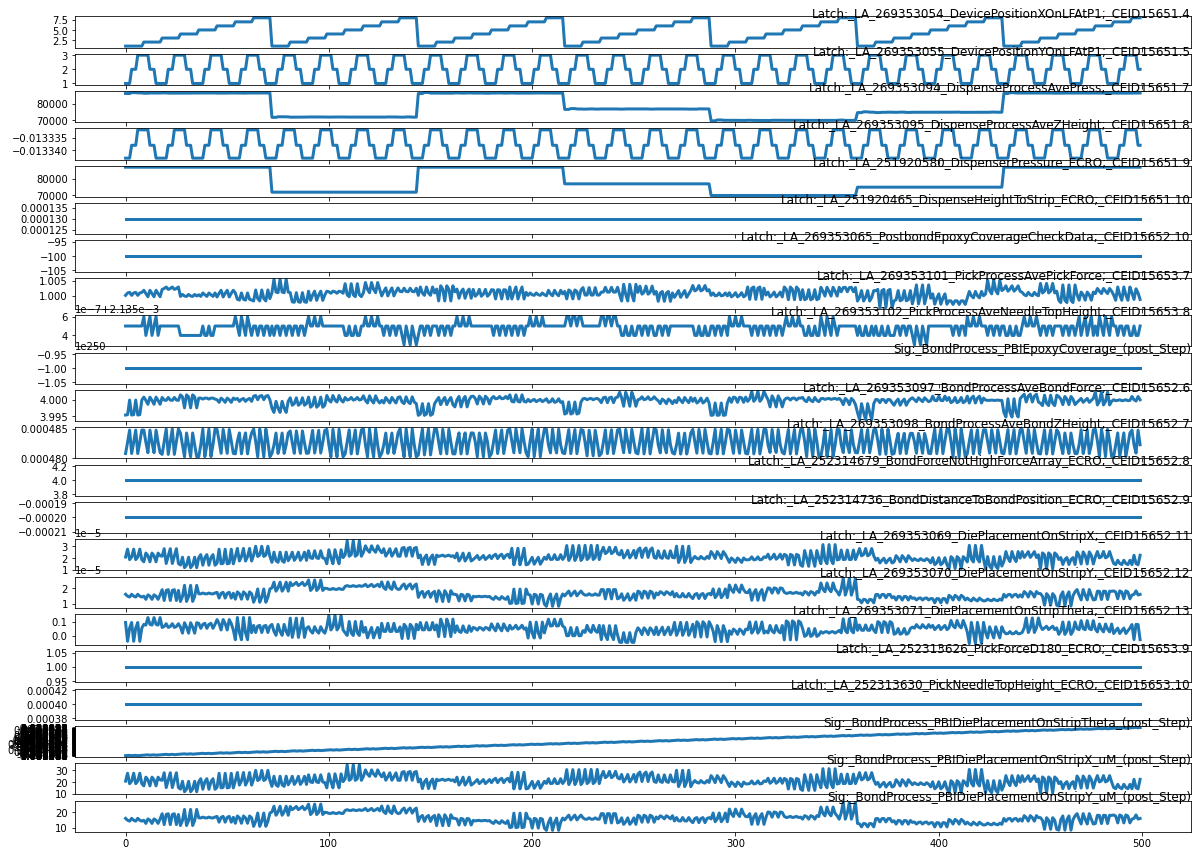

In [5]:
import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),bound=500)
#FDC_2021Data.to_csv(os.path.join(FDC_path,'2021_drop.csv'))

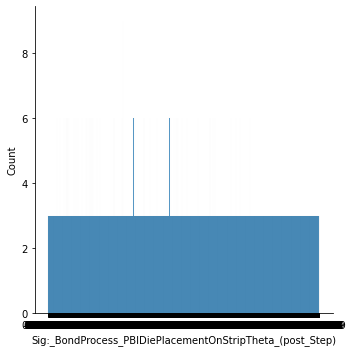

In [45]:
import seaborn as sns
sns.displot(FDC_2021Data.iloc[:,19][:10000])

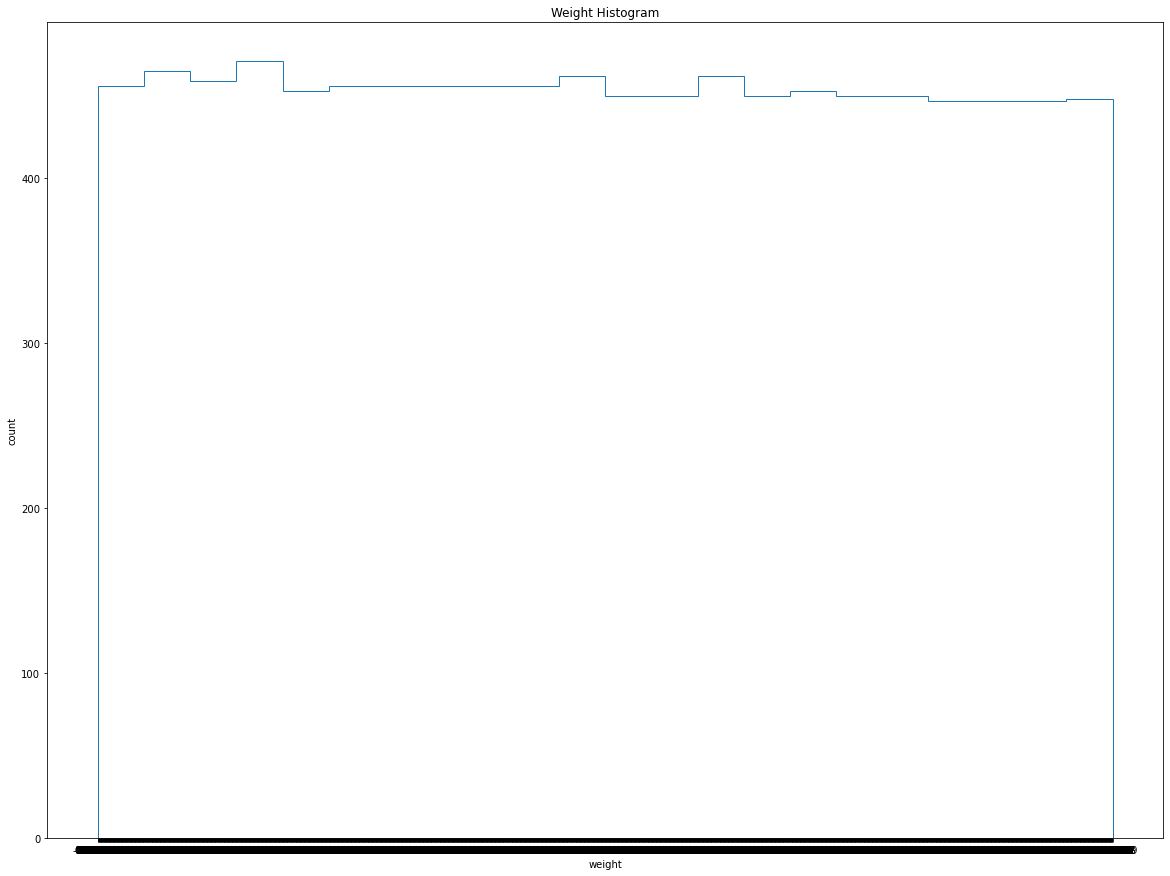

In [42]:
plt.hist(FDC_2021Data.iloc[:,19][:10000],histtype='step',bins='auto')
plt.title('Weight Histogram')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# Generate Dataset

In [5]:
Y_LIST = [3,4,5,6,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37]
#X_LIST = list(range(14))+list(range(15,24,1))
X_LIST = find_coi(Y_LIST)
X_LIST

[0,
 1,
 2,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 31,
 32,
 33,
 34,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [40]:


train_count = int(FDC_2021Data.shape[0]/24*0.8)*24
print(train_count*24)

training_set=FDC_2021Data.iloc[:train_count,:].values
testing_set=FDC_2021Data.iloc[train_count:,:].values

1213056


(50544, 15)

In [57]:
FDC_2021Data

,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,Sig:_BondProcess_AveBondForce_(post_Step),Sig:_BondProcess_AveBondZHeight_(post_Step),Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7,Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8,Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6,Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7,Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11,Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652.12,Latch:_LA_269353071_DiePlacementOnStripTheta;_CEID15652.13,Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step)
0,78130,-0.013120,80000,3.9959,0.000421,1.00210,0.00213,3.9959,0.000421,0.000028,-0.000006,0.025793,0.025793,27.826,-6.0057
1,79634,-0.013106,80000,3.9954,0.000422,1.00430,0.00213,3.9954,0.000422,0.000033,-0.000011,0.094290,0.094290,33.395,-10.8550
2,80338,-0.013091,80000,4.0008,0.000423,1.00100,0.00213,4.0008,0.000423,0.000031,-0.000011,0.087034,0.087034,31.549,-11.0760
3,80541,-0.013091,80000,4.0021,0.000423,0.99783,0.00213,4.0021,0.000423,0.000026,-0.000012,0.066133,0.066133,26.281,-11.9490
4,80351,-0.013106,80000,4.0004,0.000422,1.00150,0.00213,4.0004,0.000422,0.000027,-0.000013,-0.024499,-0.024499,26.854,-12.9240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63187,70594,-0.013106,70000,3.9995,0.000421,1.00280,0.00213,3.9995,0.000421,0.000031,-0.000014,0.063311,0.063311,30.683,-13.6510
63188,70462,-0.013091,70000,4.0007,0.000422,0.99935,0.00213,4.0007,0.000422,0.000029,-0.000018,0.089885,0.089885,28.735,-17.8440
63189,70505,-0.013091,70000,4.0011,0.000422,0.99891,0.00213,4.0011,0.000422,0.000024,-0.000018,0.082998,0.082998,24.303,-18.4100
63190,70541,-0.013106,70000,4.0003,0.000421,1.00040,0.00213,4.0003,0.000421,0.000036,-0.000018,0.115170,0.115170,36.294,-17.6930


In [25]:
import gen_dataset as gd
importlib.reload(gd)

training_set,testing_set,train_X,train_y,test_X,test_y,sc_test,org_test_y = gd.data_scaling(data=FDC_2021Data,X_win_size=24,y_win_size=24,mode='robust',X_col=X_LIST,y_col=Y_LIST)

1213056
(50544, 16)
(12648, 16)
Mode:robust

(2104, 24, 3)
Gen data info:
X_data_shape:(2104, 24, 16)
y_data_shape:(2104, 24, 3)


(525, 24, 3)
Gen data info:
X_data_shape:(525, 24, 16)
y_data_shape:(525, 24, 3)


(525, 24, 3)
Gen data info:
X_data_shape:(525, 24, 16)
y_data_shape:(525, 24, 3)


Data shape info:
origin_test_data:(12648, 16)
X_train:(2104, 24, 16)
y_train:(2104, 24, 3)
X_test:[[-0.63985317 -0.48275862 -0.625      -3.2        -0.5819209  -0.16736402
  -1.         -3.2        -0.5819209  -0.65        0.24355301  0.48590981
   0.          0.48590981 -0.64336602  0.23741984]
 [-0.63276479  0.         -0.625      -2.66666667 -0.02259887 -0.29288703
   0.         -2.66666667 -0.02259887  1.06666667 -0.15759312 -0.33083706
   0.         -0.33083706  1.07501467 -0.15942893]
 [-0.65162495  0.51724138 -0.625       0.13333333  0.55367232  0.79497908
   0.          0.13333333  0.55367232  0.41666667 -0.15759312 -1.37384322
   0.         -1.37384322  0.43181628 -0.15985982]
 [-0.655

In [54]:
np.all(np.isfinite(training_set))

False

In [53]:
from sklearn.decomposition import PCA


pca=PCA(n_components=3)
pca.fit(training_set).transform(training_set)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [5]:
%load_ext tensorboard
%tensorboard --logdir logs --port 6006

Reusing TensorBoard on port 6006 (pid 11804), started 0:36:55 ago. (Use '!kill 11804' to kill it.)

In [55]:
import model_eva as me
importlib.reload(me)

from tcn import TCN
import datetime

tensorboard_callback = me.setup_tfboard(clean=True,log_name_type='FDC')
best_model = me.model_chk("Model/best.h5")


print()

model = Sequential([
    TCN(input_shape=(train_X.shape[1],train_X.shape[2]),
        nb_filters=64,
        kernel_size=3,
        nb_stacks=2,
        dilations=(1, 2, 4, 8, 16, 32),
        padding='causal',
        use_skip_connections=False,
        dropout_rate=0.0,
        return_sequences=False,
        activation='relu',
        kernel_initializer='he_normal',
        use_batch_norm=True,
        use_layer_norm=False,
        use_weight_norm=False
        ),
    Dense(train_y.shape[1], activation='linear')
])

model.summary()
#tcn_full_summary(model, expand_residual_blocks=False)
model.compile('adam', 'mae')

print('\nTrain...')



model.fit(train_X,train_y, epochs=100, verbose=2,callbacks=[tensorboard_callback,best_model],shuffle=False)

Clean current logs
checkpoint save in Model/best.h5

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_3 (TCN)                  (None, 64)                294464    
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1560      
Total params: 296,024
Trainable params: 292,952
Non-trainable params: 3,072
_________________________________________________________________

Train...
Epoch 1/100


ValueError: in user code:

    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:860 train_function  *
        return step_function(self, iterator)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:850 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2844 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3619 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:843 run_step  **
        outputs = model.train_step(data)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:801 train_step
        loss = self.compiled_loss(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:1337 mean_absolute_error
        return backend.mean(math_ops.abs(y_pred - y_true), axis=-1)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\ops\math_ops.py:1250 binary_op_wrapper
        raise e
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\ops\math_ops.py:1234 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\ops\math_ops.py:548 subtract
        return gen_math_ops.sub(x, y, name)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10549 sub
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:3560 _create_op_internal
        ret = Operation(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 24 and 3 for '{{node mean_absolute_error/sub}} = Sub[T=DT_FLOAT](sequential_6/dense_5/BiasAdd, IteratorGetNext:1)' with input shapes: [?,24], [?,24,3].


In [56]:
model = Sequential()

model.add(LSTM(256, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=False))
# output shape: (1, 1)
model.add(Dense(train_y.shape[1]))    # or use model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

model.fit(train_X,train_y, epochs=100, verbose=2,callbacks=[tensorboard_callback,best_model],shuffle=False)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               279552    
_________________________________________________________________
dense_6 (Dense)              (None, 24)                6168      
Total params: 285,720
Trainable params: 285,720
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


ValueError: in user code:

    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:860 train_function  *
        return step_function(self, iterator)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:850 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2844 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3619 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:843 run_step  **
        outputs = model.train_step(data)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\training.py:801 train_step
        loss = self.compiled_loss(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\keras\losses.py:1209 mean_squared_error
        return backend.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10410 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:3560 _create_op_internal
        ret = Operation(
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 24 and 3 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_7/dense_6/BiasAdd, IteratorGetNext:1)' with input shapes: [?,24], [?,24,3].


got 0424 dataset
got 0425 dataset
got 0426 dataset
got 0427 dataset
got 0428 dataset

 (270954, 26) 

0 : Unnamed: 0
1 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
2 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
3 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
4 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
5 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
6 : Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10
7 : Latch:_LA_269353066_DiePositionOnStripX;_CEID15652.4
8 : Latch:_LA_269353067_DiePositionOnStripY;_CEID15652.5
9 : Latch:_LA_252904019_WaferID;_CEID15653.4
10 : Latch:_LA_269353065_PostbondEpoxyCoverageCheckData;_CEID15652.10
11 : Sig:_BondProcess_AveBondForce_(post_Step)
12 : Sig:_BondProcess_AveBondZHeight_(post_Step)
13 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
14 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
15 : Sig:_BondProcess_PBIEpoxyCoverage_(post_Step)
16 : L

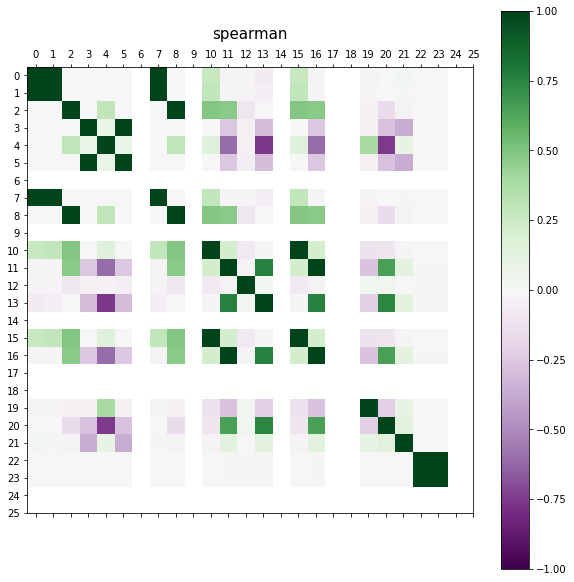

In [71]:
import data_vis as dv
import importlib
importlib.reload(dv)


FDC_Data_list = []
for day in range(24,29,1):
    FDC_Data_list.append(read_data(os.path.join(FDC_path,'data_04'+str(day)+'.csv')))
    print("got 04{} dataset".format(day))

FDC_Data = pd.concat(FDC_Data_list)    
print("\n",FDC_Data.shape,"\n")
dv.df_col_map(FDC_Data)
dv.show_corr(FDC_Data,group=range(FDC_Data.shape[1]))
